# Project Business Statistics: E-news Express



## Define Problem Statement and Objectives

E-news Express, an online news portal, aims to expand its business by acquiring new subscribers. With every visitor to the website taking certain actions based on their interest, the company plans to analyze these actions to understand user interests and determine how to drive better engagement. The executives at E-news Express are of the opinion that there has been a decline in new monthly subscribers compared to the past year because the current webpage is not designed well enough in terms of the outline & recommended content to keep customers engaged long enough to make a decision to subscribe.

The design team of the company has researched and created a new landing page that has a new outline & more relevant content shown compared to the old page. In order to test the effectiveness of the new landing page in gathering new subscribers, the Data Science team conducted an experiment by randomly selecting 100 users and dividing them equally into two groups. The existing landing page was served to the first group (control group) and the new landing page to the second group (treatment group). Data regarding the interaction of users in both groups with the two versions of the landing page was collected. Being a data scientist in E-news Express, you have been asked to explore the data and perform a statistical analysis (at a significance level of 5%) to determine the effectiveness of the new landing page in gathering new subscribers for the news portal by answering the following questions:

1. Do the users spend more time on the new landing page than on the existing landing page?
2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?
3. Does the converted status depend on the preferred language?
4. Is the time spent on the new page the same for the different language users?

# Columns

- user_id - Unique user ID of the person visiting the website
- group - Whether the user belongs to the first group (control) or the second group (treatment)
- landing_page - Whether the landing page is new or old
- time_spent_on_the_page - Time (in minutes) spent by the user on the landing page
- converted - Whether the user gets converted to a subscriber of the news portal or not
- language_preferred - Language chosen by the user to view the landing page

## Import all the necessary libraries

In [39]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as st 
from scipy.stats import chi2_contingency
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import levene
import numpy as np
sns.set_palette("Set2", 9)


## Reading the Data into a DataFrame

In [40]:

df= pd.read_csv('abtest.csv')

## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

In [41]:
#First five columns 
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [42]:
#Last 5 columns 
df.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


In [43]:
print(f'This dataset has {df.shape[0]} rows and {df.shape[1]} columns ')

This dataset has 100 rows and 6 columns 


In [44]:
#Overview of data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


We have a total of 6 columns with two numerical columns and 4 object columns.This datset is fairly small only having 100 rows  

In [45]:
df.describe()

,user_id,time_spent_on_the_page
count,100.000000,100.000000
mean,546517.000000,5.377800
std,52.295779,2.378166
min,546443.000000,0.190000
25%,546467.750000,3.880000
50%,546492.500000,5.415000
75%,546567.250000,7.022500
max,546592.000000,10.710000


We can that the average time spent was 5.37 minutes. With the lowest being 20 seconds and the longest being 10 minutes 

In [46]:
df.isna().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

No na values in our dataset

### Univariate Analysis

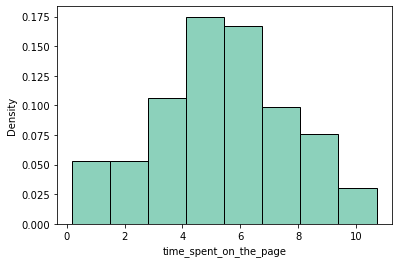

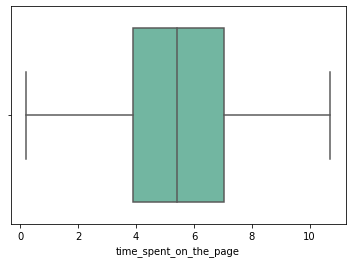

In [47]:
sns.histplot(df.time_spent_on_the_page, stat= 'density')
plt.show()
sns.boxplot(data = df,  x = 'time_spent_on_the_page')
plt.show()

### Bivariate Analysis

In [48]:
# A contingency table usually shows frequencies for particular combinations of values of two discrete random column  
cross = pd.crosstab(df.group, df.converted)
cross['conversion_rate'] = cross.yes/cross.sum(axis = 1)
cross

converted,no,yes,conversion_rate
group,,,
control,29,21,0.42
treatment,17,33,0.66


We can see that we have an even split of 50/50 from control and treatment. More people seem to be converting in treatment group with a 66% percentage converting. 

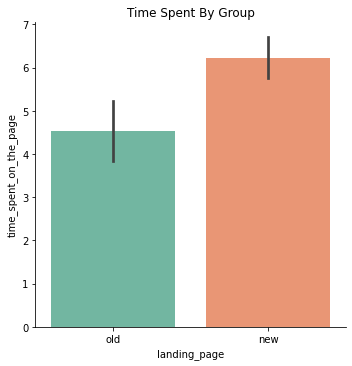

In [49]:
# Plotting landing page against time spent on the page 
sns.catplot(data = df,y ='time_spent_on_the_page', x = 'landing_page', kind = 'bar')
plt.title('Time Spent by Group'.title())
plt.show()

We can see that  the new page has more time spent on

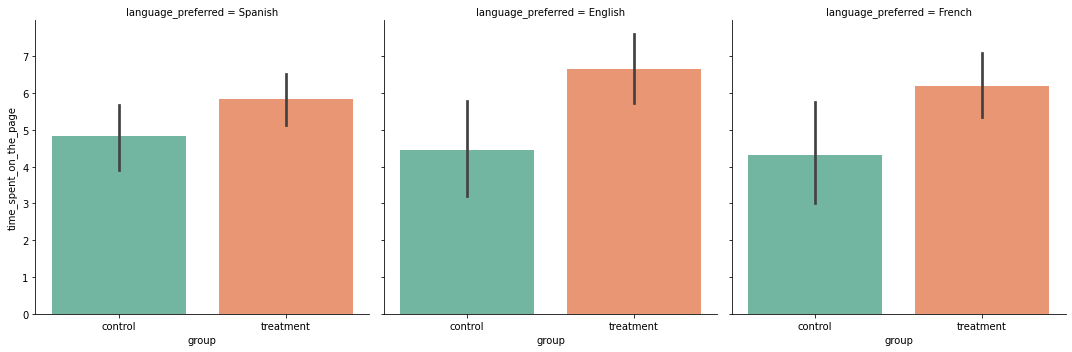

In [50]:
#plotting different time spent by the language preferred of each group 
sns.catplot(data = df,y ='time_spent_on_the_page', x = 'group', kind = 'bar', col = 'language_preferred')
plt.show()

We continue to see a increase of time spent in the treament column for each language 

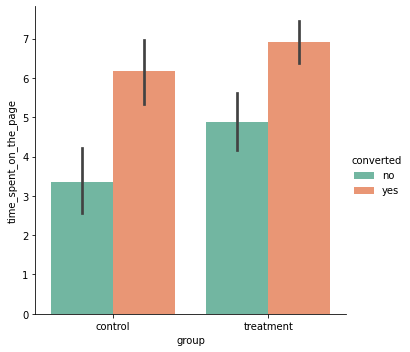

In [51]:
sns.catplot(data = df,y ='time_spent_on_the_page', x = 'group', kind = 'bar',hue = 'converted')
plt.show()

We can see that treamt had more converted users and as well overall more time spent.

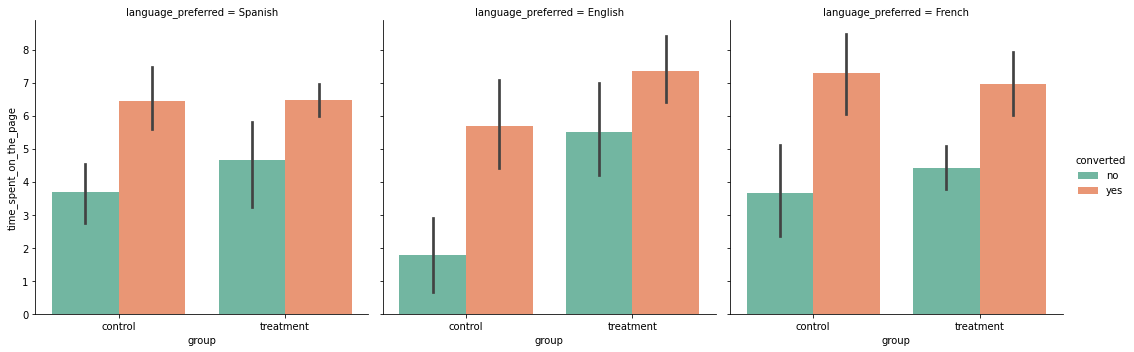

In [52]:
sns.catplot(data = df,y ='time_spent_on_the_page', x = 'group', kind = 'bar',hue = 'converted', col='language_preferred')
plt.show()

Here we see the same pattern contiuing with treament group having higher and time spent in the converted column yes in each language 

## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

In [53]:
df.groupby('landing_page')['time_spent_on_the_page'].sum()

landing_page
new    311.16
old    226.62
Name: time_spent_on_the_page, dtype: float64

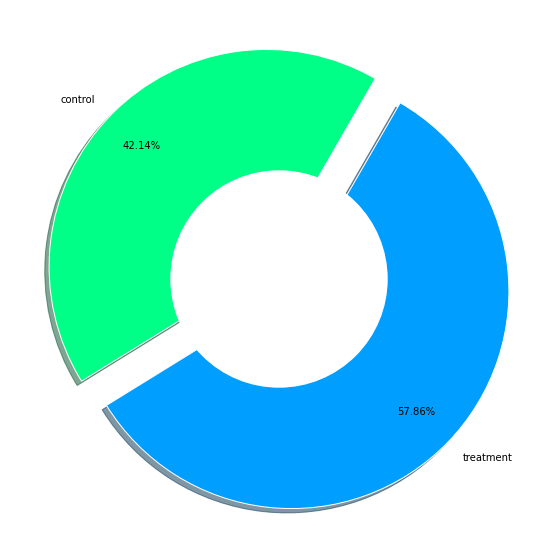

In [54]:
colors = sns.color_palette("hsv")[2:5]
labels = df.group.unique()
plt.figure(figsize= (10,10))
plt.pie(df.groupby('group')['time_spent_on_the_page'].sum(),
        labels = labels, 
        colors=colors, 
        autopct= '%.2f%%', 
        shadow= True, 
        explode = [.08, .08],
        startangle=60,
        wedgeprops={'edgecolor': 'white'},
        pctdistance=0.8
        )
centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

We can see that treament had more time spent with 311 minutes and 57.86% of the whole 

### Step 1: Define the null and alternate hypotheses

# H0 Control Group and Treament  Group have the same amount spent 
# H1 Control Group and Treament Group have different amount spent 

### Step 2: Select Appropriate test

We will use scipy.stats.ttest_ind.  It Calculate the T-test for the means of two independent samples of scores.

This is a test for the null hypothesis that 2 independent samples have identical average (expected) values. This test assumes that the populations have identical variances by default.

### Step 3: Decide the significance level

We will use 0.05 as our Significance Level

### Step 4: Collect and prepare data

In [55]:
control = df.loc[df['group'] == 'control']
treatment = df.loc[df['group'] == 'treatment']

In [56]:
# find the sample means and sample standard deviations for the two samples
print('The mean usage time of control group is ' + str(control['time_spent_on_the_page'].mean()))
print('The mean usage time of treament group is ' + str(treatment['time_spent_on_the_page'].mean()))
print('The standard deviation of usage time of control group is ' + str(round(control['time_spent_on_the_page'].std(),2)))
print('The standard deviation of usage time of treament group  is ' + str(round(treatment['time_spent_on_the_page'].std(),2)))

The mean usage time of control group is 4.532400000000001
The mean usage time of treament group is 6.2232
The standard deviation of usage time of control group is 2.58
The standard deviation of usage time of treament group  is 1.82


### Step 5: Calculate the p-value

In [57]:
results = st.ttest_ind(control['time_spent_on_the_page'], treatment['time_spent_on_the_page'], equal_var= False, alternative= 'two-sided')

### Step 6: Compare the p-value with $\alpha$

In [58]:
alpha = 0.05  # critical statistical significance

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print('We reject the null hypothesis')
else:
    print("We can't reject the null hypothesis")

p-value:  0.0002784762450333098
We reject the null hypothesis


### Step 7:  Draw inference

We can reject the null hypothesis and say that the two groups have different time spent 

**A similar approach can be followed to answer the other questions.**

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

### Let's write the null and alternative hypothesis
Let p1,p2 be the proportions of defects in conversion old page and landing page respectively.
Will test the null hypothesis

- H0: p1 = p2

against the alternate hypothesis 

- HA: p1 != p2


We will use the statsmodels.stats.proportion.proportions_ztest
Test for proportions based on normal (z) test

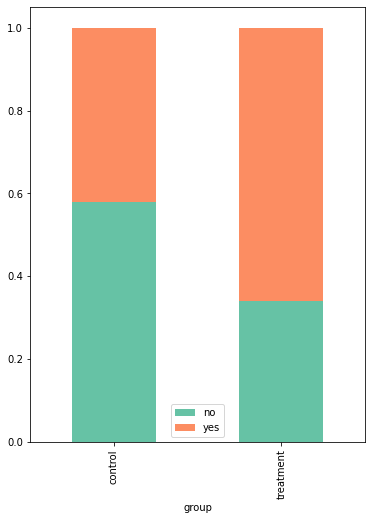

In [59]:
ax = pd.crosstab(df.group,df.converted,normalize='index').plot(kind="bar", figsize=(6,8), stacked=True)
plt.legend()
plt.show()

In [60]:
cross = pd.crosstab(df.group, df.converted)
cross['conversion_rate'] = cross.yes/cross.sum(axis = 1)
cross

converted,no,yes,conversion_rate
group,,,
control,29,21,0.42
treatment,17,33,0.66


In [61]:
# set the counts of defective items
defect_count = np.array([21, 33])

# set the sample sizes
nobs = np.array([50, 50])


result  =  proportions_ztest(defect_count, nobs)

In [62]:
alpha = 0.05  # critical statistical significance

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print('We reject the null hypothesis')
else:
    print("We can't reject the null hypothesis")

p-value:  0.0002784762450333098
We reject the null hypothesis


## Draw inference
Yes we can conclude that the  conversion rate for the new page is greater than the conversion rate for the old page. 

## 3. Is the conversion and preferred language are independent or related?

### Let's write the null and alternative hypothesis
We will test the null hypothesis
- H0: Conversion is independent of language


against the alternate hypothesis
- HA: Conversion is dependent of language 



This function computes the chi-square statistic and p-value for the hypothesis test of independence of the observed frequencies in the contingency table. The expected frequencies are computed based on the marginal sums under the assumption of independence;

In [63]:
crosstab = pd.crosstab(df.converted,df.language_preferred)
crosstab

language_preferred,English,French,Spanish
converted,,,
no,11,19,16
yes,21,15,18


In [64]:
result = chi2_contingency(crosstab)
alpha = 0.05  # critical statistical significance

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print('We reject the null hypothesis')
else:
    print("We can't reject the null hypothesis")

p-value:  0.0002784762450333098
We reject the null hypothesis


### Draw inference

We reject the null hypothesis and say that converted is dependent on language preferred 

## 4. Is the time spent on the new page same for the different language users?

In [65]:
df_new = df[df['landing_page'] == 'new']

<AxesSubplot:xlabel='language_preferred', ylabel='time_spent_on_the_page'>

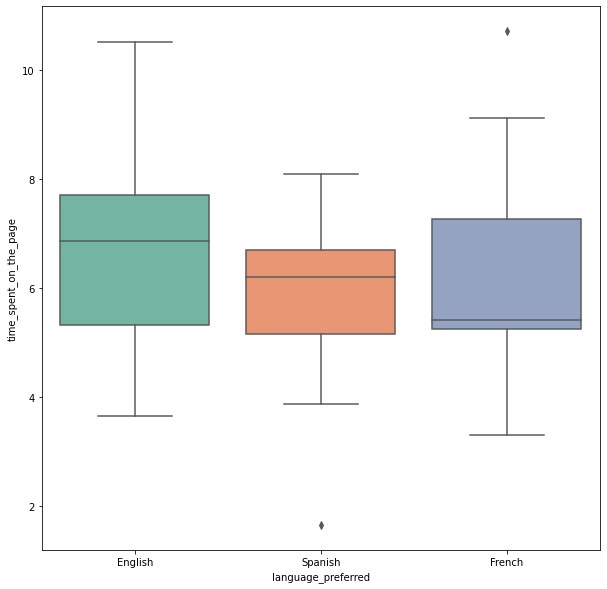

In [66]:
plt.figure(figsize=(10,10))
sns.boxplot(data = df_new, x = 'language_preferred', y = 'time_spent_on_the_page')

## Shapiro-Wilk’s test
We will test the null hypothesis

H0:Time Spent  follows a normal distribution against

against the alternative hypothesis

Ha:
 Time Spent does not follow a normal distribution

The shapiro() function of Scipy will be used to compute the test statistic and p-value.

In [67]:
# Assumption 1: Normality
# import the required function
from scipy import stats

# find the p-value
w, p_value = stats.shapiro(df_new['time_spent_on_the_page']) 
print('The p-value is', p_value)

The p-value is 0.8040016293525696


Since p-value of the test is very large, we fail to reject the null hypothesis that the response follows the normal distribution.

# Levene’s test
We will test the null hypothesis

H0: All the population variances are equal

against the alternative hypothesis

Ha: At least one variance is different from the rest

The levene() function of Scipy will be used to compute the test statistic and p-value.

In [68]:
#Assumption 2: Homogeneity of Variance
#import the required function
from scipy.stats import levene

statistic, p_value = levene( df_new[df_new['language_preferred']=="English"]['time_spent_on_the_page'], 
                                   df_new[df_new['language_preferred']=='French']['time_spent_on_the_page'], 
                                   df_new[df_new['language_preferred']=='Spanish']['time_spent_on_the_page'] )
# find the p-value
print('The p-value is', p_value)

The p-value is 0.46711357711340173


Since the p-value is large, we fail to reject the null hypothesis of homogeneity of variances.

## Step 1: Define the null and alternate hypotheses
𝐻0: All languages have the same time spent 

𝐻𝑎: All languages have different time spent 

## Step 2: Select Appropriate test
.f_oneway

## Step 3: Decide the significance level
As given in the problem statement, we select α = 0.05.

In [69]:
# create a subsetted data frame of the time spent on the new page by English language users 
time_spent_English = df_new[df_new['language_preferred']=="English"]['time_spent_on_the_page']
# create subsetted data frames of the time spent on the new page by French and Spanish language users
time_spent_French = df_new[df_new['language_preferred']=='French']['time_spent_on_the_page']   # complete your code here
time_spent_Spanish = df_new[df_new['language_preferred']=='Spanish']['time_spent_on_the_page']  

In [70]:
# complete the code to import the required function
from scipy.stats import f_oneway

# write the code to calculate the p-value
test_stat, p_value = f_oneway(time_spent_English, time_spent_French, time_spent_Spanish)   #complete the code by filling appropriate parameters in the blanks

print('The p-value is', p_value)

The p-value is 0.43204138694325955


In [71]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.43204138694325955 is greater than the level of significance, we fail to reject the null hypothesis.


In [72]:
#import the required function
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog = df_new['time_spent_on_the_page'], groups = df_new['language_preferred'], alpha = 0.05)
print(m_comp)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1  group2 meandiff p-adj   lower  upper  reject
-----------------------------------------------------
English  French  -0.4673 0.7434 -2.0035  1.069  False
English Spanish  -0.8285 0.3995 -2.3647 0.7078  False
 French Spanish  -0.3612 0.8326  -1.874 1.1516  False
-----------------------------------------------------


We can conclude that all Groups have the similar time spent on the page since our p-adj value is greater then our threshold. 

## Conclusion and Business Recommendations

We have implemented several statistical test since there has been a decline in new monthly subscribers compared to the past year because the current webpage is not designed well enough in terms of the outline & recommended content to keep customers engaged long enough to make a decision to subscribe.

1. Do the users spend more time on the new landing page than on the existing landing page?
- Yes we can conclude that more time is spent on the landing page of our new sites.



2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?
- Yes we can conclude that the  conversion rate for the new page is greater than the conversion rate for the old page. 

3. Does the converted status depend on the preferred language?
- Yes the converted status depends on the the preferred language 


4. Is the time spent on the new page the same for the different language users
- No time spent is very similar in our new page for each of languages. 

Our new site has led to more time being spent on our new page and resulted with more subcribers converting 